In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision.datasets.utils import download_url
import tarfile
from torch.utils.data import random_split
import torch.optim as optim

In [ ]:
dataset_link = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_link,r"J:\Datasets")

100%|██████████| 135107811/135107811 [00:45<00:00, 2976001.29it/s]


In [ ]:
with tarfile.open(r"J:\Datasets\cifar10.tgz",'r:gz') as tar:
    tar.extractall(path=r"J:\Datasets\data")

In [3]:
dir = r"J:\Datasets\data\cifar10"
os.listdir(dir)

['test', 'train']

In [4]:
print(os.listdir(dir+r"\train\airplane"))

['0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0025.png', '0026.png', '0027.png', '0028.png', '0029.png', '0030.png', '0031.png', '0032.png', '0033.png', '0034.png', '0035.png', '0036.png', '0037.png', '0038.png', '0039.png', '0040.png', '0041.png', '0042.png', '0043.png', '0044.png', '0045.png', '0046.png', '0047.png', '0048.png', '0049.png', '0050.png', '0051.png', '0052.png', '0053.png', '0054.png', '0055.png', '0056.png', '0057.png', '0058.png', '0059.png', '0060.png', '0061.png', '0062.png', '0063.png', '0064.png', '0065.png', '0066.png', '0067.png', '0068.png', '0069.png', '0070.png', '0071.png', '0072.png', '0073.png', '0074.png', '0075.png', '0076.png', '0077.png', '0078.png', '0079.png', '0080.png', '0081.png', '0082.png', '0083.png', '00

In [5]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [6]:
dataset = ImageFolder(os.path.join(dir,"train"),transform=ToTensor())
dataset

Dataset ImageFolder
    Number of datapoints: 50000
    Root location: J:\Datasets\data\cifar10\train
    StandardTransform
Transform: ToTensor()

In [7]:
len(dataset)

50000

In [8]:
classes = dataset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
img, label = dataset[0]
img.permute(1,2,0).shape

torch.Size([32, 32, 3])

In [10]:
def show_image(image, label):
    plt.imshow(image.permute(1,2,0))
    plt.title(classes[label])
    plt.show()

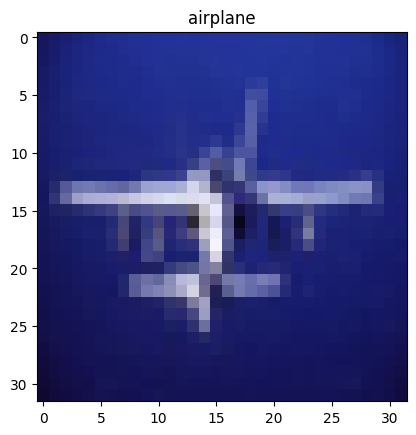

In [11]:
show_image(*dataset[900])

In [12]:
torch.manual_seed(42)

val_size = 5000
train_size = len(dataset) - val_size

train_data, val_data = random_split(dataset,[train_size,val_size])
len(train_data), len(val_data)

(45000, 5000)

In [13]:
from torch.utils.data.dataloader import DataLoader
batch_size=64

In [14]:
train_DL = DataLoader(train_data,batch_size,shuffle=True, num_workers=4,pin_memory=True)
val_DL = DataLoader(val_data,batch_size*2,shuffle=True, num_workers=4, pin_memory=True)

In [15]:
for i, l in train_DL:
    print(l)
    break

tensor([8, 8, 6, 9, 9, 3, 6, 8, 7, 3, 6, 5, 4, 1, 9, 1, 5, 8, 2, 1, 3, 0, 1, 7,
        0, 5, 5, 7, 3, 2, 8, 6, 0, 0, 3, 5, 2, 6, 5, 9, 3, 7, 2, 2, 5, 9, 2, 5,
        4, 3, 3, 0, 9, 8, 7, 1, 4, 2, 2, 7, 7, 4, 1, 2])


In [16]:
from torchvision.utils import make_grid
def show_batch(data):
    for image, label in data:
        fig, ax = plt.subplots(figsize=(12,6))
        # plt.imshow(image[0].permute(1,2,0))
        ax.imshow(make_grid(image,nrow=8).permute(1,2,0))
        plt.show()
        break

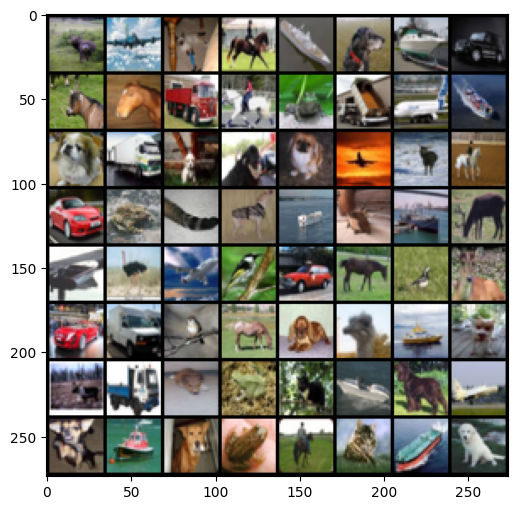

In [17]:
show_batch(train_DL)

In [18]:
import torch.nn as nn
import torch.nn.functional as F

In [19]:
conv = nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1)
pool = nn.MaxPool2d(2,2)
for images, label in train_DL:
    print("actual image shape: ",images.shape)
    out = conv(images)
    print("after applying convolutional layer: ",out.shape)
    out = pool(out)
    print("after applying the max pooling layer: ",out.shape)
    break

actual image shape:  torch.Size([64, 3, 32, 32])
after applying convolutional layer:  torch.Size([64, 8, 32, 32])
after applying the max pooling layer:  torch.Size([64, 8, 16, 16])


In [25]:
class CNN_Model(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.flatten = nn.Flatten()
        self.dense1 = nn.Linear(16*4*4, 256)
        self.dense2 = nn.Linear(256, 128)
        self.dense3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self,x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.flatten(x)
        x = self.relu(self.dense1(x))
        x = self.relu(self.dense2(x))
        x = self.dense3(x)
        return x

In [26]:
model = CNN_Model()
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print("Device: ",device)

model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=0.001)

Device:  cuda


In [27]:
epochs = 10
for i in range(1,epochs+1):
    model.train()
    cr_loss = 0.0

    for images, labels in train_DL:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        cr_loss += loss.item()

    print(f"Epochs {i}/{epochs} Loss:{cr_loss/len(train_DL)}")

Epochs 1/10 Loss:1.7106165555729107
Epochs 2/10 Loss:1.373009748333557
Epochs 3/10 Loss:1.2100093594159593
Epochs 4/10 Loss:1.1023678799921817
Epochs 5/10 Loss:1.0241877905685792
Epochs 6/10 Loss:0.9562894579192455
Epochs 7/10 Loss:0.8904831088994715
Epochs 8/10 Loss:0.8445108418606899
Epochs 9/10 Loss:0.7959323733706366
Epochs 10/10 Loss:0.7567616278220984


In [28]:
model.eval()

CNN_Model(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dense1): Linear(in_features=256, out_features=256, bias=True)
  (dense2): Linear(in_features=256, out_features=128, bias=True)
  (dense3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)

In [42]:
test_data = ImageFolder(os.path.join(dir,"test"),transform=ToTensor())
print("Test data size",len(test_data))
test_DL = DataLoader(test_data, batch_size=64, shuffle=True, num_workers=2)

Test data size 10000


In [34]:
correct = 0 
total = 0
with torch.no_grad():
    for images, labels in test_DL:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        # print(outputs)
        _, predictions = torch.max(outputs, 1)
        correct += (predictions==labels).sum().item()
        total += len(labels)
        # break
print(f"Accuracy: {100*correct/total}")

Accuracy: 67.94


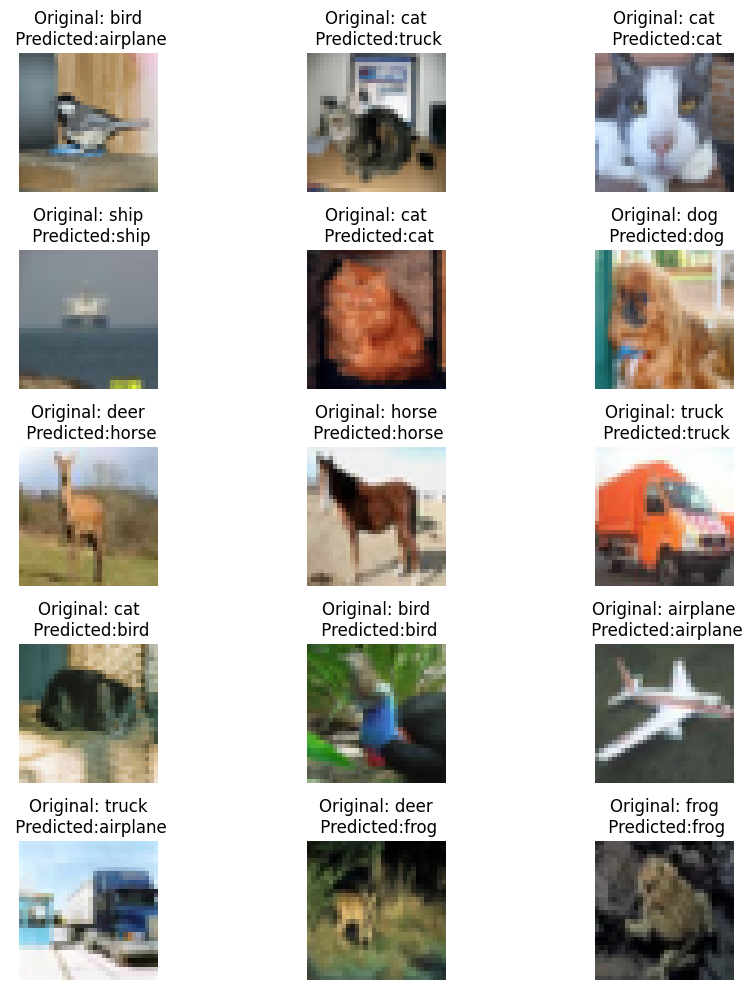

In [52]:
for images, labels in test_DL:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _,predictions = torch.max(outputs,1)
    plt.figure(figsize=(12,10))
    for index,img in enumerate(images[:15]):
        # print(img,index)
        plt.subplot(5,3,index+1)
        plt.imshow(img.cpu().permute(1,2,0))
        plt.title(f"Original: {classes[labels[index]]}\n Predicted:{classes[predictions[index]]}")
        plt.axis('off')
        plt.tight_layout()
    plt.show()
        
    break

In [53]:
torch.save(model,"cifar10_cnn.pth")